### Datos Faltantes

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
s = pd.Series([1,2,3])

In [3]:
s.loc[0] = None

In [4]:
s

0    nan
1   2.00
2   3.00
dtype: float64

In [5]:
s = pd.Series(['a', 'b', 'c'])
s.loc[0] = None
s.loc[1] = np.nan

In [6]:
s

0    None
1     NaN
2       c
dtype: object

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_context('talk')
import plotly.express as px
import numpy as np
import pandas as pd

In [8]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

%matplotlib inline

In [9]:
melb_data = pd.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')

In [10]:
melb_data.shape

(13580, 21)

In [11]:
melb_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.00,13580.00,13580.00,13580.00,13580.00,13580.00,13518.00,13580.00,7130.00,8205.00,13580.00,13580.00,13580.00
mean,2.94,1075684.08,10.14,3105.30,2.91,1.53,1.61,558.42,151.97,1964.68,-37.81,145.00,7454.42
std,0.96,639310.72,5.87,90.68,0.97,0.69,0.96,3990.67,541.01,37.27,0.08,0.10,4378.58
min,1.00,85000.00,0.00,3000.00,0.00,0.00,0.00,0.00,0.00,1196.00,-38.18,144.43,249.00
25%,2.00,650000.00,6.10,3044.00,2.00,1.00,1.00,177.00,93.00,1940.00,-37.86,144.93,4380.00
50%,3.00,903000.00,9.20,3084.00,3.00,1.00,2.00,440.00,126.00,1970.00,-37.80,145.00,6555.00
75%,3.00,1330000.00,13.00,3148.00,3.00,2.00,2.00,651.00,174.00,1999.00,-37.76,145.06,10331.00
max,10.00,9000000.00,48.10,3977.00,20.00,8.00,10.00,433014.00,44515.00,2018.00,-37.41,145.53,21650.00


### Reconocimiento de datos ruidosos

In [12]:
condition = melb_data == 0

In [13]:
# Observaciones que tienen asigando el valor 0
cols = melb_data[melb_data == 0].count(axis='index')
cols[cols>0]

Distance           6
Bedroom2          16
Bathroom          34
Car             1026
Landsize        1939
BuildingArea      17
dtype: int64

Este resultado muestra que algunas columnas tienen unas pocas observaciones que valen cero y otras que tienen muchas.
Lo que tenemos que averiguar es si esos valores CERO son posibles valores de la variable en cuestion o son datos faltantes que fueron codificados de esa manera.

In [14]:
# observaciones que no tienen valores asignados
melb_data.isna().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car               True
Landsize         False
BuildingArea      True
YearBuilt         True
CouncilArea       True
Lattitude        False
Longtitude       False
Regionname       False
Propertycount    False
dtype: bool

In [15]:
# recuento de valores no asignados para cada columna
melb_data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

Vemos que las columnas BuildingArea, YearBuilt y CouncilArea son las que tienen una mayor proporcion de valores no asignados.
Esto va a ser un problema con el que vamos a tener que lidiar mas adelante.

### Exploracion de las variables Bedroom2, Bathroom y Distance

<AxesSubplot:xlabel='Bedroom2', ylabel='Type'>

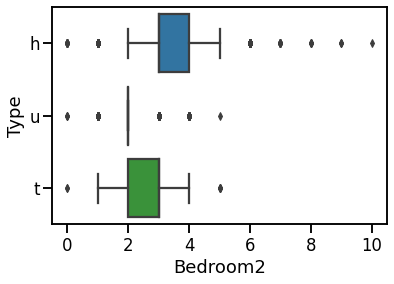

In [16]:
sns.boxplot(data = melb_data[melb_data.Bedroom2 < 20],
           x = 'Bedroom2',
           y = 'Type')

In [17]:
Bedroom2 = melb_data.Bedroom2
Rooms = melb_data.Rooms

pd.crosstab(Bedroom2, Rooms)

Rooms,1,2,3,4,5,6,7,8,10
Bedroom2,,,,,,,,,
0.00,0,5,8,3,0,0,0,0,0
1.00,663,21,5,2,0,0,0,0,0
2.00,16,3539,162,19,1,0,0,0,0
3.00,2,74,5626,175,18,1,0,0,0
4.00,0,8,73,2473,42,4,0,1,0
5.00,0,1,5,15,531,2,2,0,0
6.00,0,0,0,0,2,59,0,2,0
7.00,0,0,0,0,1,1,8,0,0
8.00,0,0,0,0,1,0,0,4,0


No se pueden tener mas Bedrooms que Rooms, por lo tanto, a mi criterio todas las observaciones que indican mas Bedrooms que Rooms deben estar mal. Por lo tanto la variable Rooms pareciera ser mejor que la variable Bedrooms. Recordemos ademas que, segun se indicaba antes, la variable Bedrooms2 habia sido traida de una fuente diferente. Por lo tanto lo mejor va a ser eliminar la columna Bedroom2.

### Eliminacion de Bedroom2

In [18]:
melb_df = melb_data.copy()
melb_df = melb_df.drop(columns = 'Bedroom2', axis = 'columns')
melb_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,1.00,1.00,202.00,nan,nan,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,1.00,0.00,156.00,79.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
2,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,2.00,0.00,134.00,150.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,3067.00,2.00,1.00,94.00,nan,nan,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
4,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,1.00,2.00,120.00,142.00,2014.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.00,S,Barry,26/08/2017,16.70,3150.00,2.00,2.00,652.00,nan,1981.00,NaN,-37.91,145.17,South-Eastern Metropolitan,7392.00
13576,Williamstown,77 Merrett Dr,3,h,1031000.00,SP,Williams,26/08/2017,6.80,3016.00,2.00,2.00,333.00,133.00,1995.00,NaN,-37.86,144.88,Western Metropolitan,6380.00
13577,Williamstown,83 Power St,3,h,1170000.00,S,Raine,26/08/2017,6.80,3016.00,2.00,4.00,436.00,nan,1997.00,NaN,-37.85,144.89,Western Metropolitan,6380.00
13578,Williamstown,96 Verdon St,4,h,2500000.00,PI,Sweeney,26/08/2017,6.80,3016.00,1.00,5.00,866.00,157.00,1920.00,NaN,-37.86,144.89,Western Metropolitan,6380.00


<AxesSubplot:xlabel='Bathroom'>

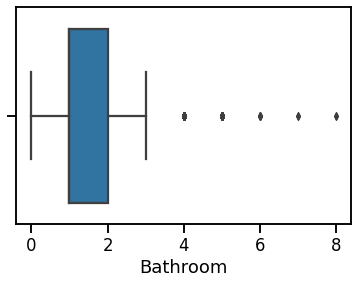

In [19]:
sns.boxplot(data = melb_data,
           x = 'Bathroom')

Hay algunas propiedades que indican que NO tienen banios. Algo que es bastante raro. Alguna accion hay que tomar con estas propiedades.

<AxesSubplot:xlabel='Bathroom', ylabel='Type'>

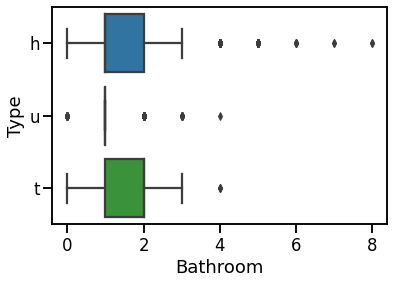

In [20]:
sns.boxplot(data = melb_data,
           x = 'Bathroom',
           y = 'Type')

In [21]:
### Ejemplo de accion: considerar que las propiedades que no listan baños suponen que existe al menos uno.
melb_df.loc[melb_df.Bathroom < 1, 'Bathroom'] = 1

cols2 = melb_df[melb_df == 0].count(axis = 0)
cols2[cols2>0]

Distance           6
Car             1026
Landsize        1939
BuildingArea      17
dtype: int64

### Libreria Missingno

In [22]:
import missingno as msno

<AxesSubplot:>

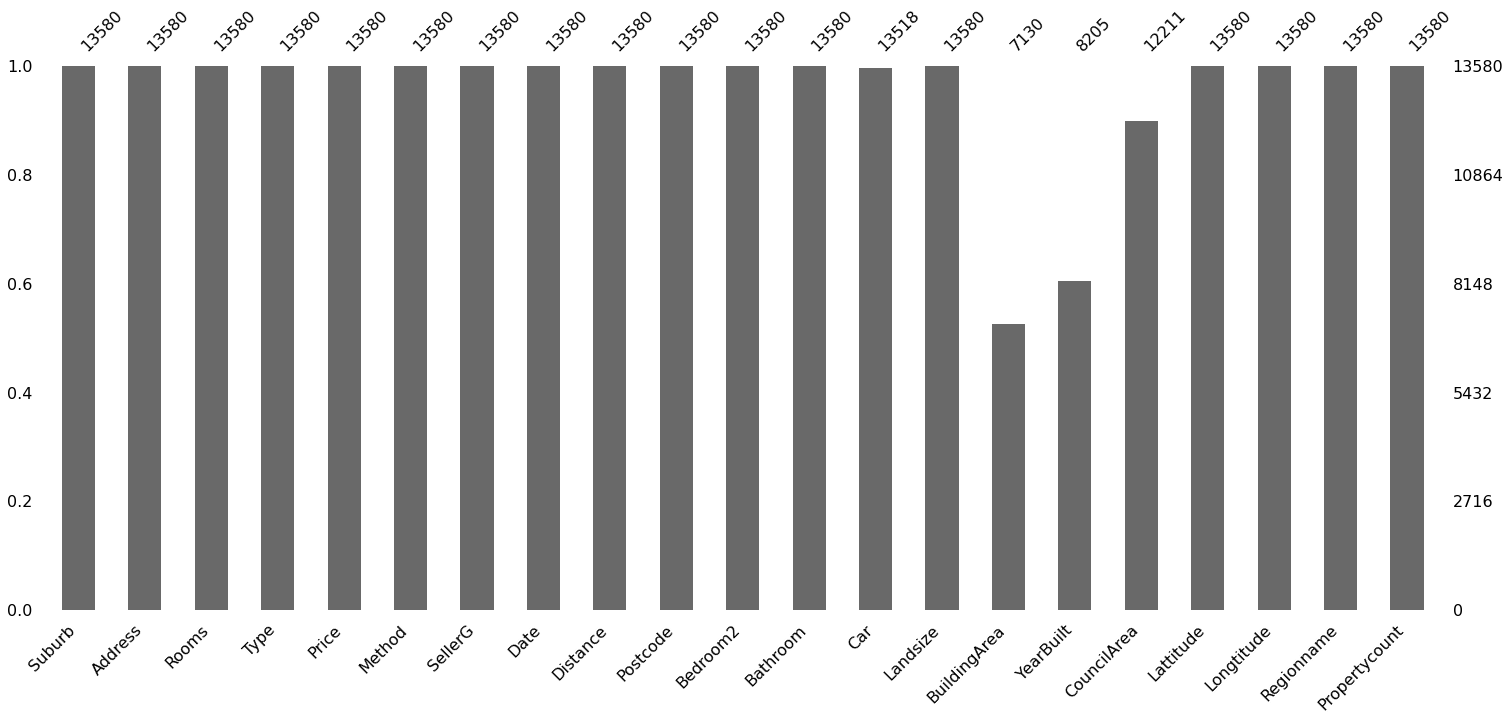

In [23]:
msno.bar(melb_data)

<AxesSubplot:>

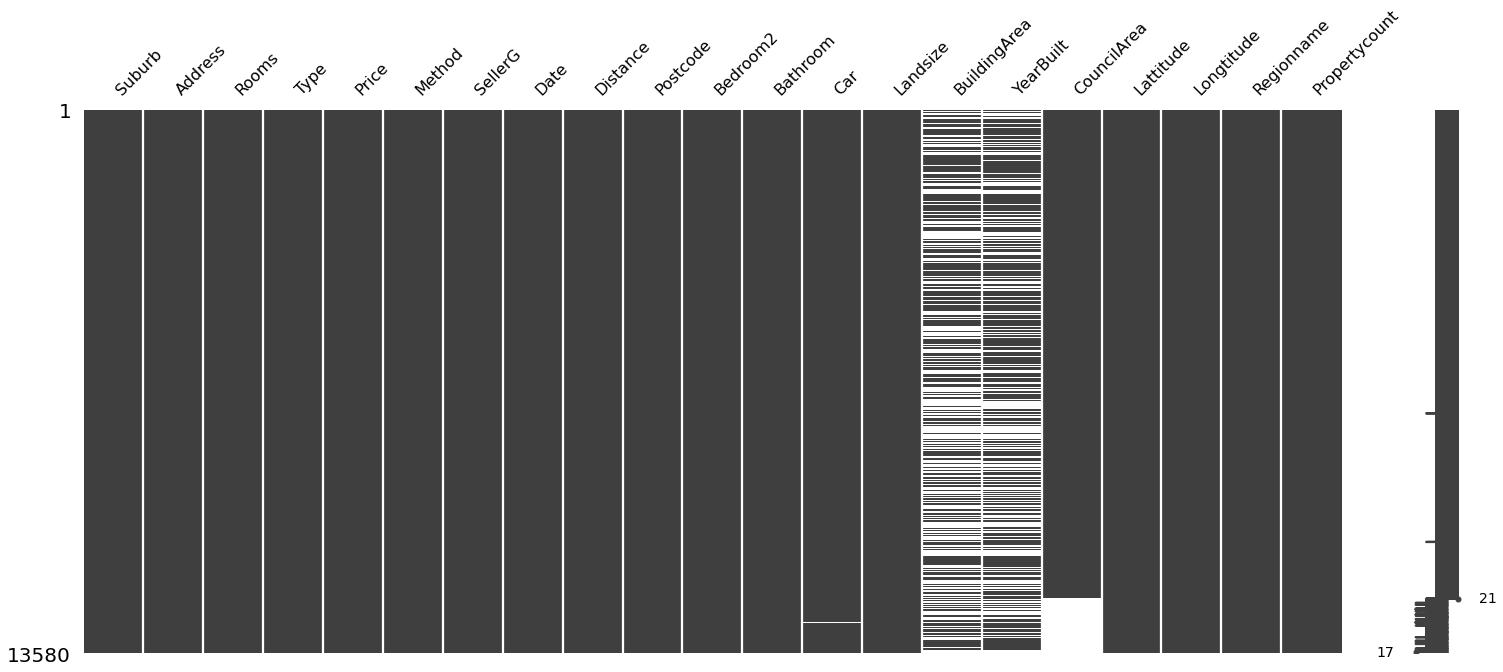

In [24]:
msno.matrix(melb_data)

Dada la enorme cantidad de datos que estamos visualizando es dificil encontrar patrones (aunque algunos ya se pueden ver) entre las colunas YearBuilt y BuildingArea. 
Por lo tanto vamos atomar una muestra del dataset para reahace este grafico.
Se puede ver que los datos faltantes de la columna Car estan todos agrupados en una misma region del dataset, por lo tanto eso hace pensar que se trato de un error sistematico, que no va a ser posible solucionar y por lo tanto vamos a tener que eliminar esos datos.

<AxesSubplot:>

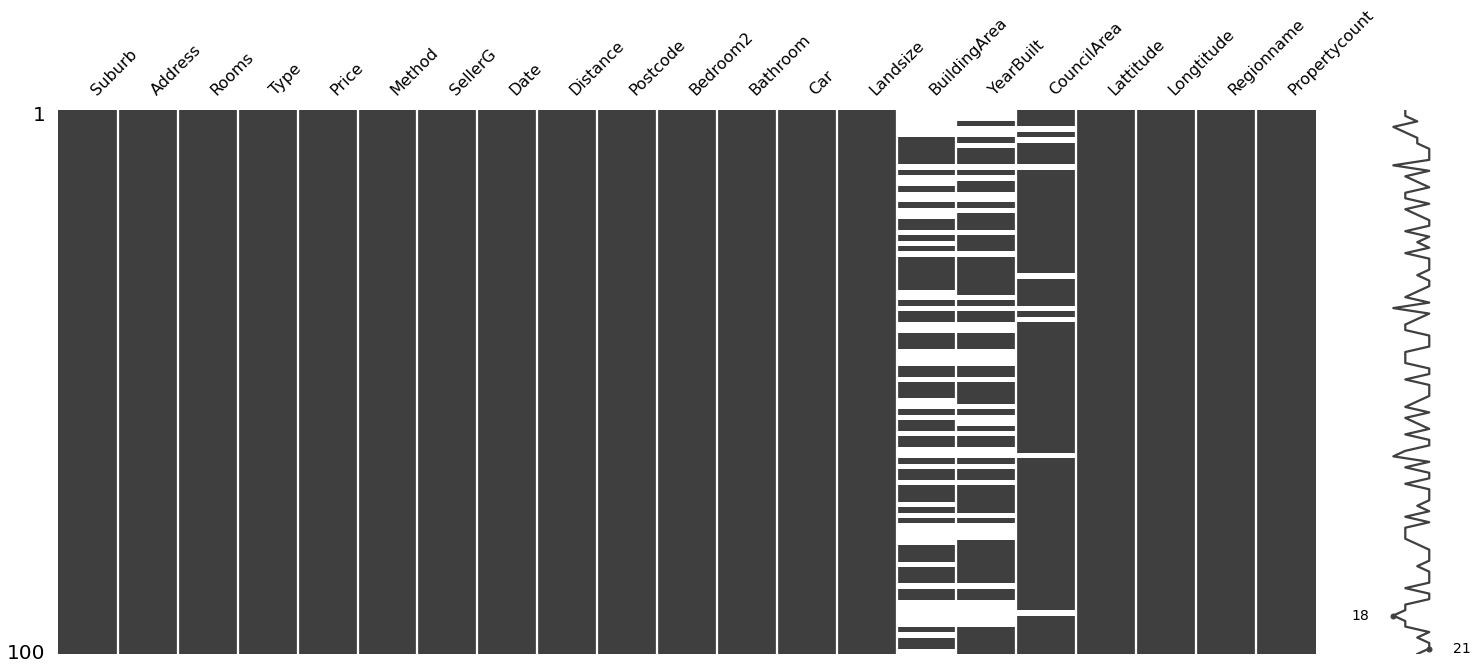

In [25]:
msno.matrix(melb_data.sample(100))

<AxesSubplot:>

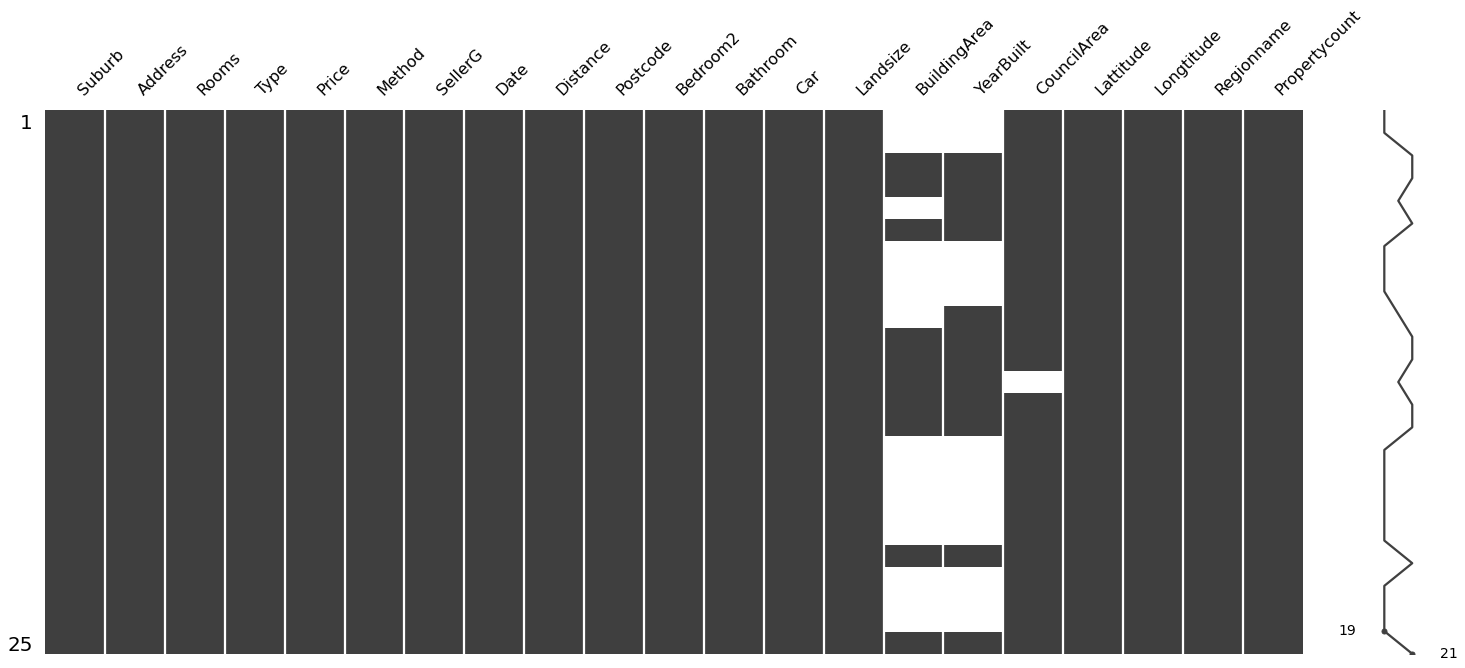

In [26]:
msno.matrix(melb_data.sample(25))

<AxesSubplot:>

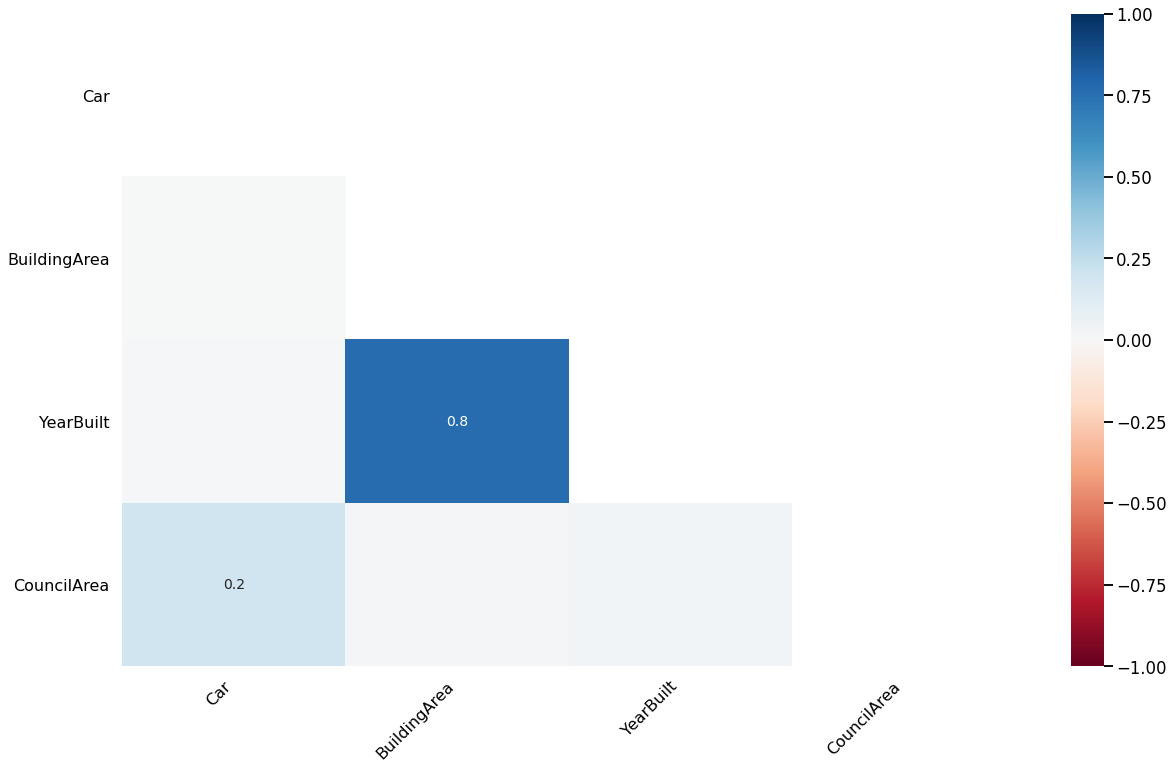

In [27]:
msno.heatmap(melb_data)

Analizando los graficos de matrix y heatpam vemos que pareciera existir una correlacion entre la falta de datos en la columna YearBuilt y la columna BuildingArea. Son ademas lasdos columnas que mas datos faltantes tienen. No asi con las demas columnas que tienen datos faltantes.

<AxesSubplot:>

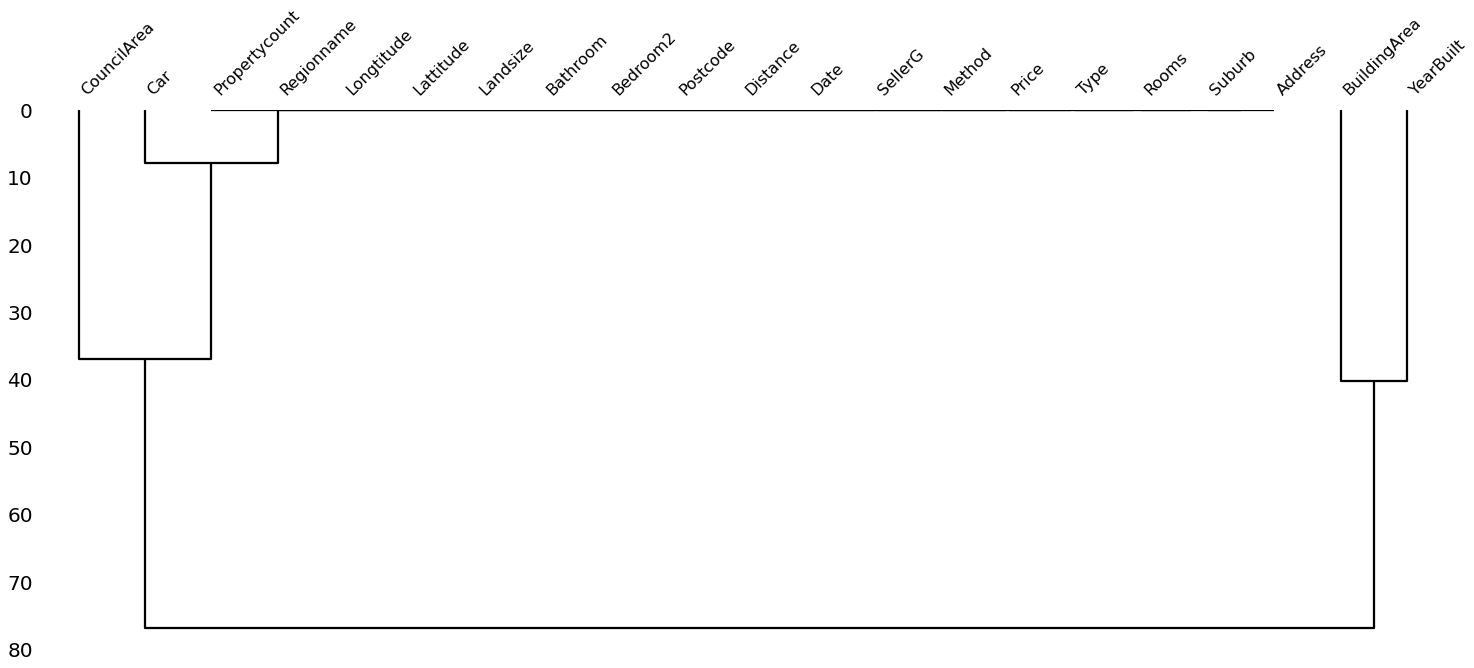

In [28]:
msno.dendrogram(melb_data)

In [29]:
Car = melb_data.Car
fig = px.histogram(Car,
                  nbins = 100,
                  labels = {'value':'Car', 'count':'number of houses'},
                  marginal = 'violin',
                  title = 'Distribution of homes with car places in Melbourne',
                  color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_layout(showlegend = False)

fig.show()

### Tratamiento de datos faltantes

In [30]:
# eliminamos los datos faltantes de la columna car

melb_df.dropna(subset=['Car'], how = 'any', inplace = True)
melb_df['Car'].isnull().sum()

0

<AxesSubplot:>

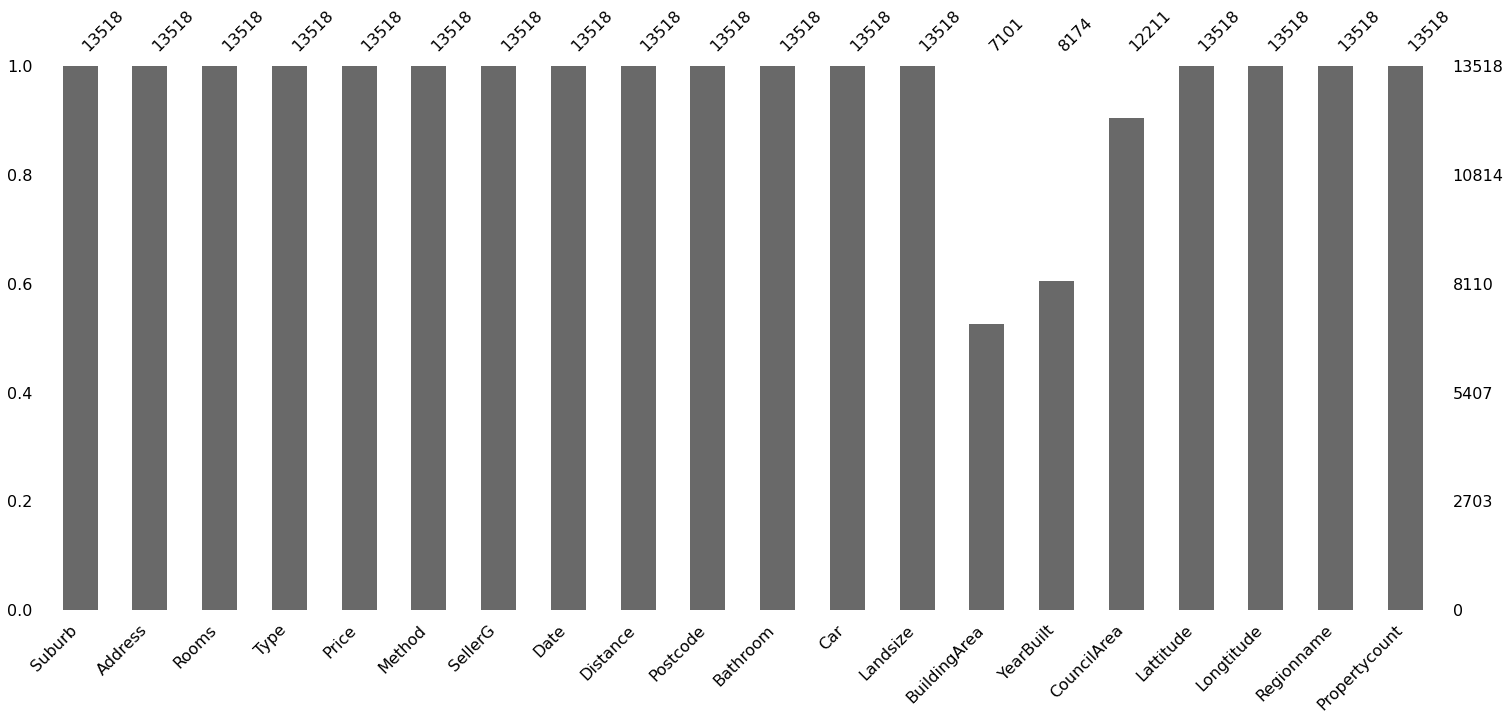

In [31]:
msno.bar(melb_df)

<AxesSubplot:>

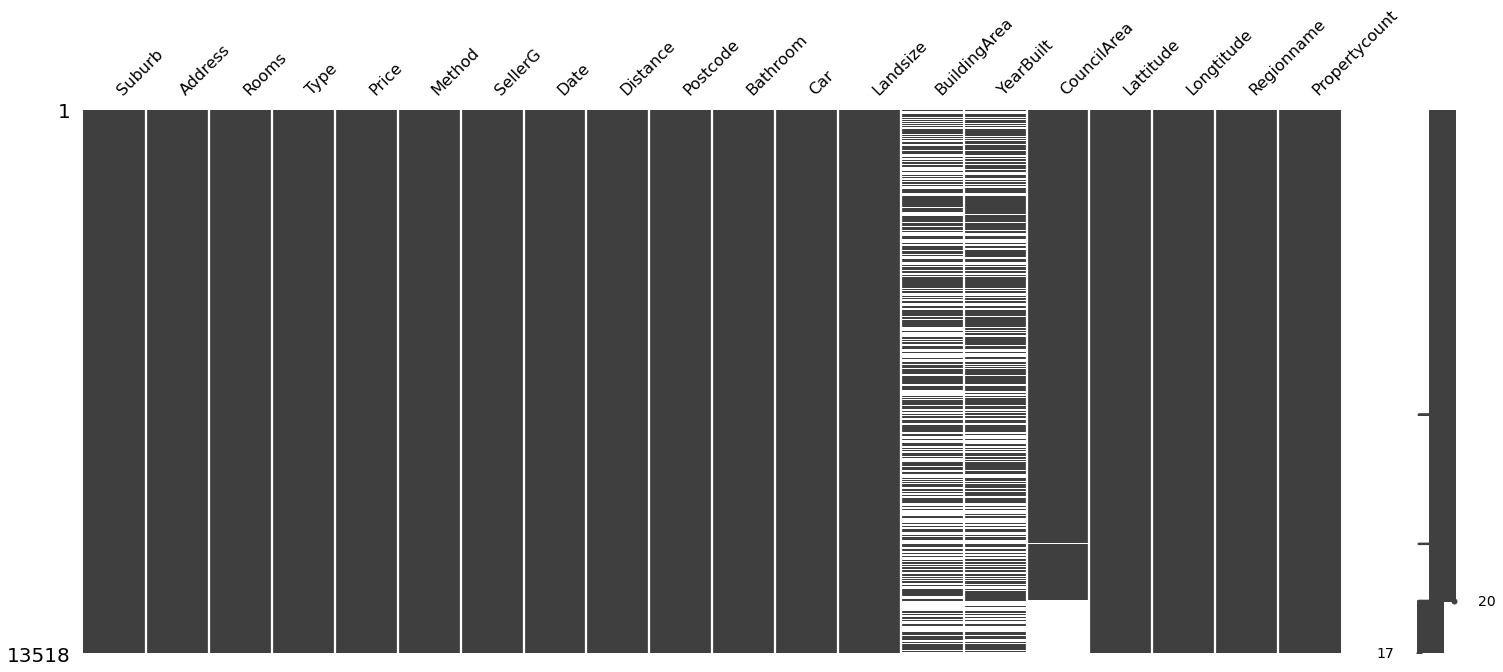

In [32]:
msno.matrix(melb_df)

In [33]:
melb_df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea     6417
YearBuilt        5344
CouncilArea      1307
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

En este momento solo las columnas BuildinArea, CouncilArea y YearBuilt tienen valores faltantes.
BuildingArea y YearBuilt tienen casi la mitad de los datos faltantes... podemos seguir adelante con el analisis eliminando esas dos columnas. Mas adelante se podrian comparar los resultados de los modelos obtenidos al eliminar esas dos columnas Vs los modelos obtenidos al quedarnos con la mitad de los datos pero utilizando tambien esas columnas. Si estas dos variables son muy importantes en la determinacion del precio de una propiedad, tal vez sea se obtenga un mejor modelo trabajando con menos datos pero que contengan esa informacion. Quedara par mas adelante.

In [34]:
melb_df.shape

(13518, 20)

In [35]:
# Vamos a eliminar las 3 columnas que contienen datos faltates.
melb_data_without_missing_values = melb_df.dropna(axis = 'columns')


---
Chequeamos que las 3 columnas han sido eliminadas

In [36]:
melb_data_without_missing_values.shape

(13518, 17)

In [37]:
melb_data_without_missing_values.isna().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bathroom         False
Car              False
Landsize         False
Lattitude        False
Longtitude       False
Regionname       False
Propertycount    False
dtype: bool

<AxesSubplot:>

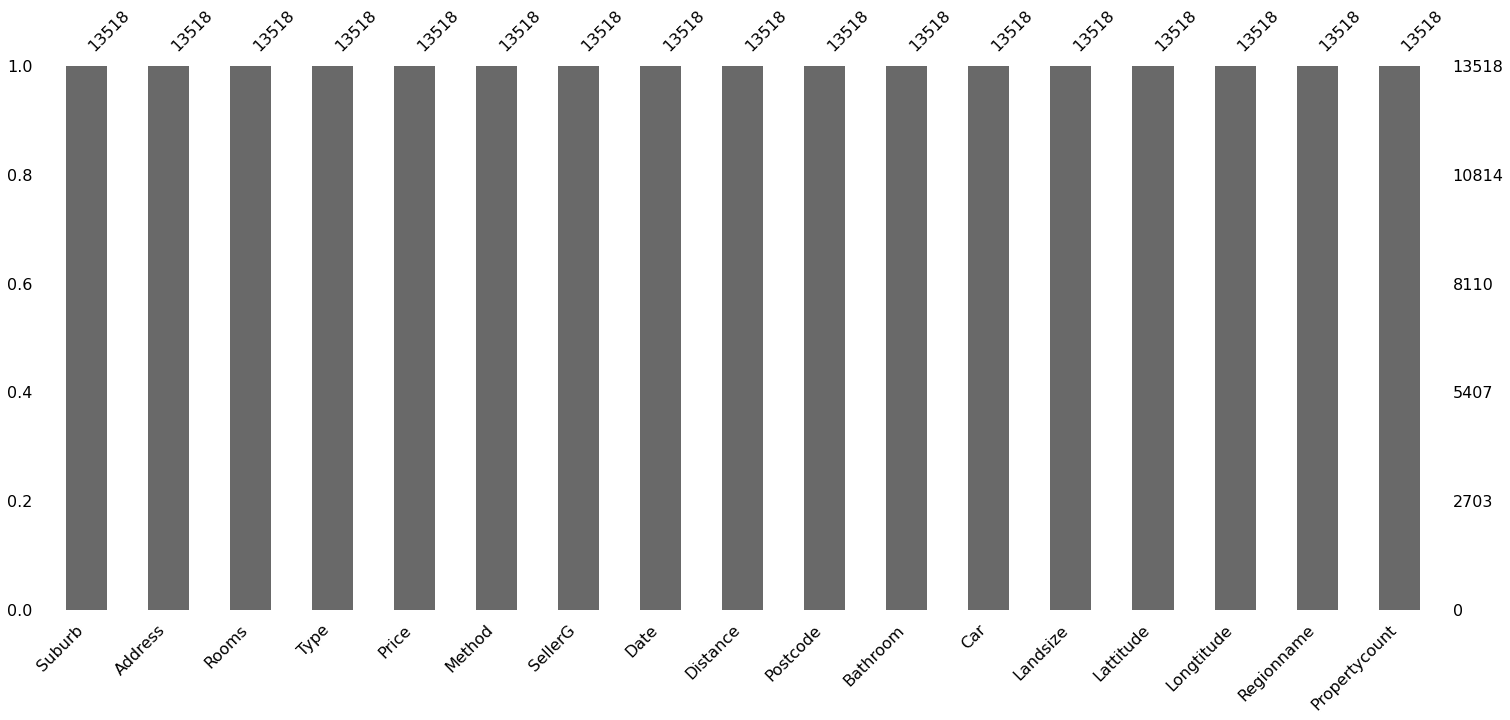

In [38]:
msno.bar(melb_data_without_missing_values)

<AxesSubplot:>

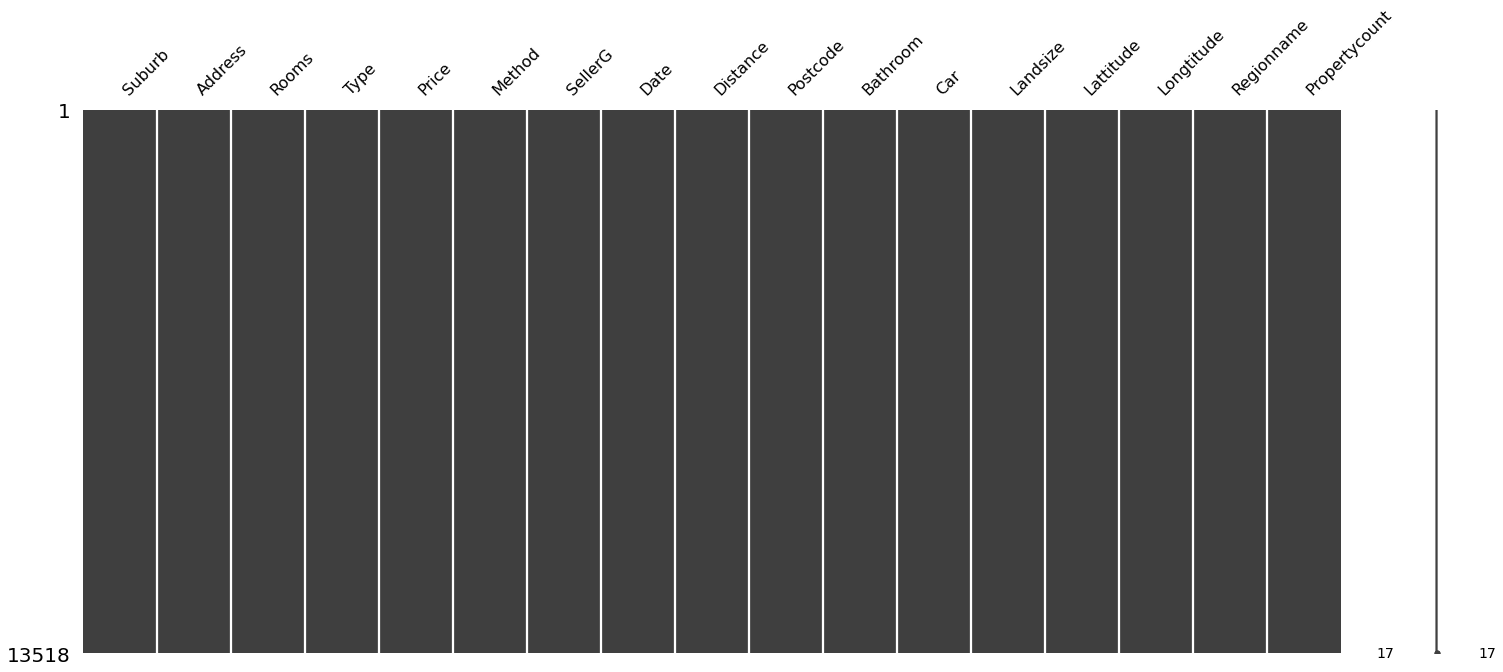

In [39]:
msno.matrix(melb_data_without_missing_values)

In [40]:
melb_data_without_missing_values.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

Con estas ultimas celdas confirmamos de 4 formas diferentes que la df melb_data_without_missing_values no contiene ningun dato faltante

---

## Imputacion de datos
Imputar refiere a reemplazar datos faltantes con valores sustitutos. Hay muchas formas de imputar los valores faltantes según la naturaleza del problema y los datos.  Segun los datos, hay técnicas para datos categóricos, datos continuos y series de tiempo. Dependiendo de la naturaleza del problema, las técnicas de imputación se pueden clasificar en general como técnicas básicas y avanzadas: 

Técnicas básicas de imputación reemplazan el dato faltante por

- Un valor constante que tiene significado dentro del dominio, como 0, distinto de todos los demás valores.

- Un valor de otro registro seleccionado al azar.

- Un valor medio, mediano o de moda para la columna.

Técnicas avanzadas de imputación reemplazan el dato faltante por

- Un valor estimado por otro modelo predictivo.


### 2.2.1 Técnicas Básicas

- Imputar con una constante

- Imputar usando estadísticos básicos (media, mediana o moda (valor mas frecuente) de cada columna en la cual los datos faltantes estan ubicados. 

Estas técnicas estan incluidas en muchos paquetes de manejo de datos faltantes, y porque son operaciones básicas de filas y columnas, tambien pueden ser realizadas por Pandas.

Veamos un ejemplo del paquete sklearn.

### Imputar con una constante

In [41]:
from sklearn.impute import SimpleImputer
# Revisar la documentacion oficial para comprander como funciona en detalle este codigo

In [42]:
# este paso esta bueno porque es un punto seguro de retorno. Sabemos que si hacemos al algo, o queremos probar algo, no
# tenemos que volver a ejecutar todas las celdas hasta aca.
melb_imp_constant = melb_df.copy()

In [43]:

imp_constant = SimpleImputer(missing_values=np.nan,
                            strategy = 'constant',
                            fill_value = 0) # podria poner cualquier valor que quiera

In [44]:
melb_imp_constant.iloc[:,:] = imp_constant.fit_transform(melb_imp_constant)

<AxesSubplot:>

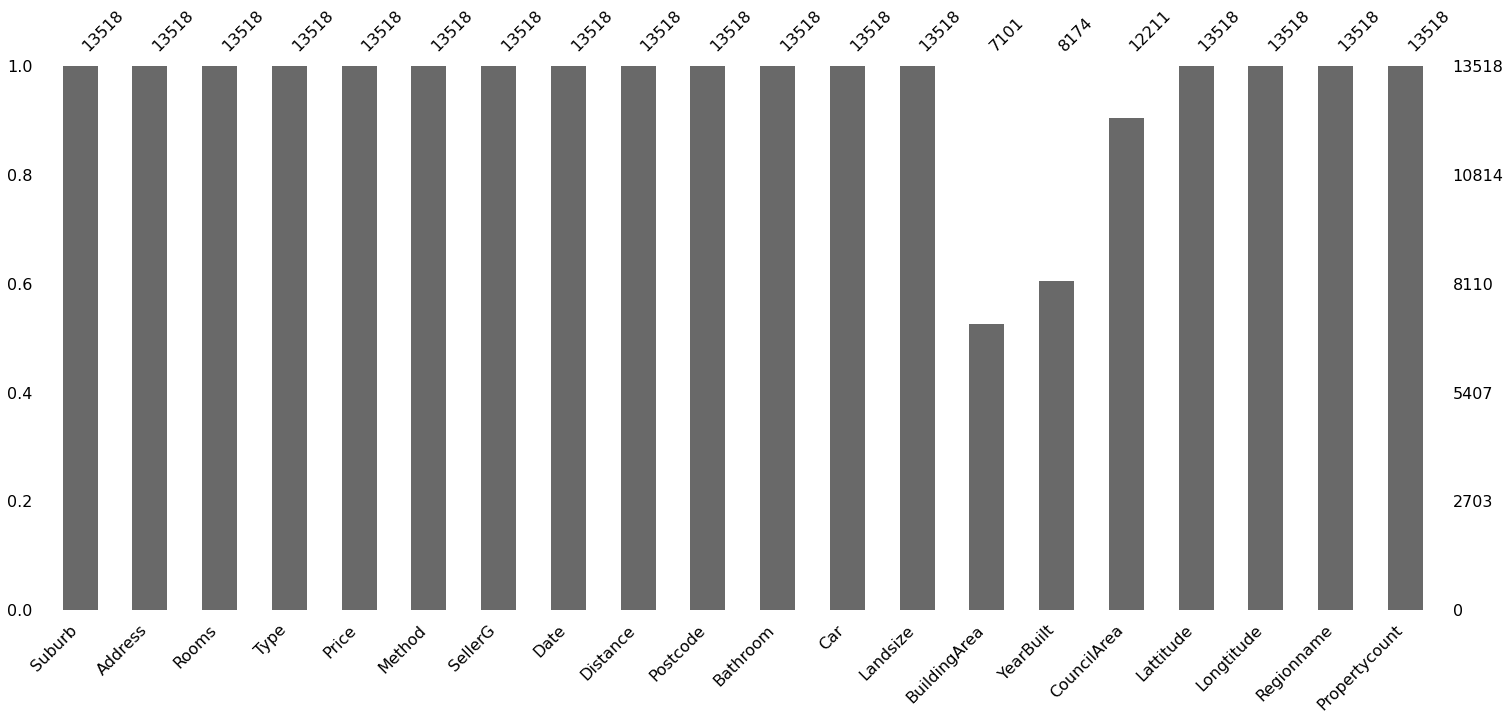

In [45]:
msno.bar(melb_df)

<AxesSubplot:>

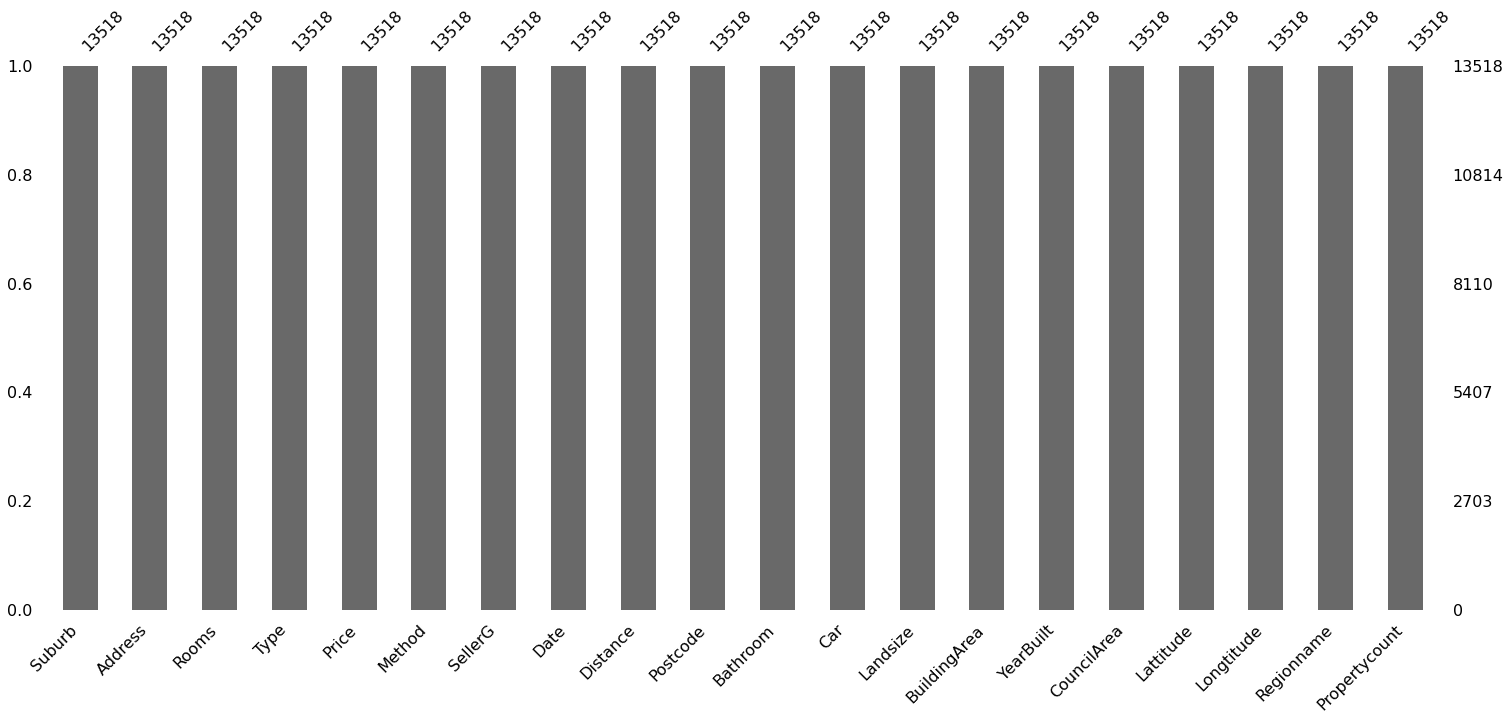

In [46]:
msno.bar(melb_imp_constant)

<AxesSubplot:>

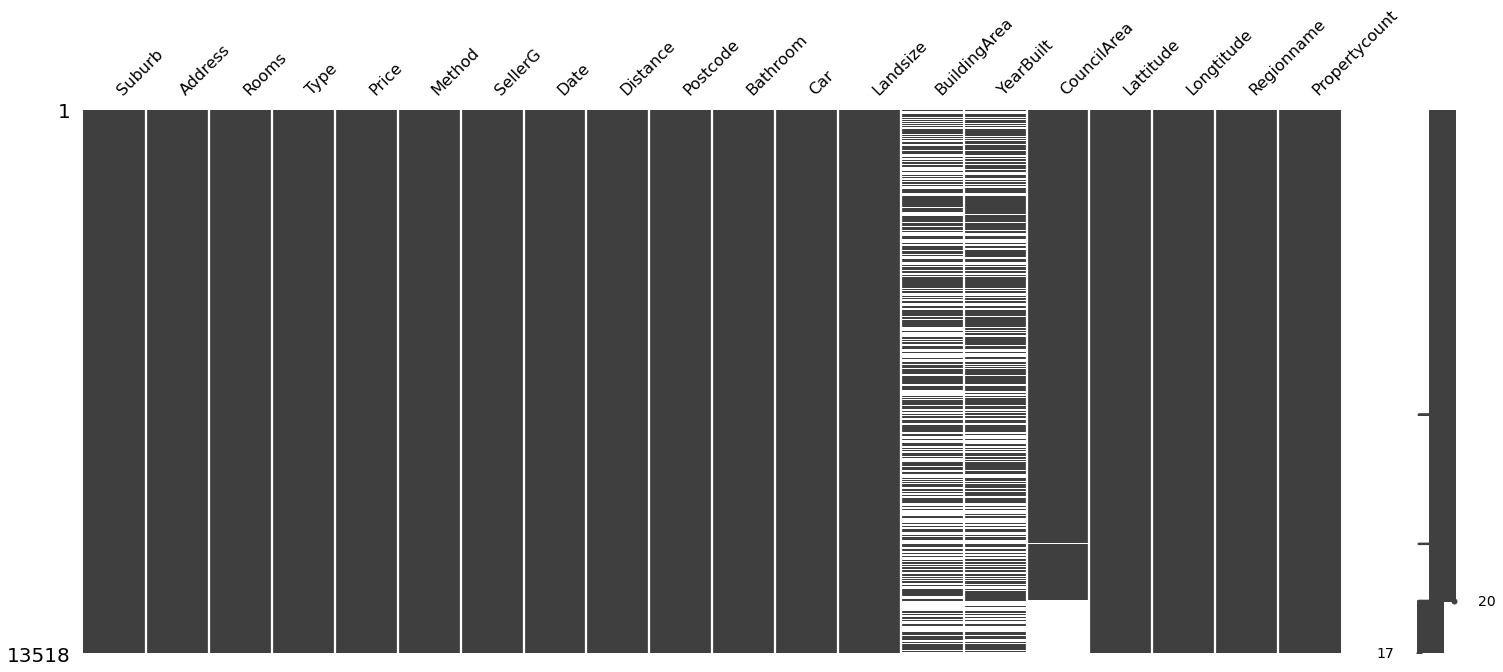

In [47]:
msno.matrix(melb_df)

<AxesSubplot:>

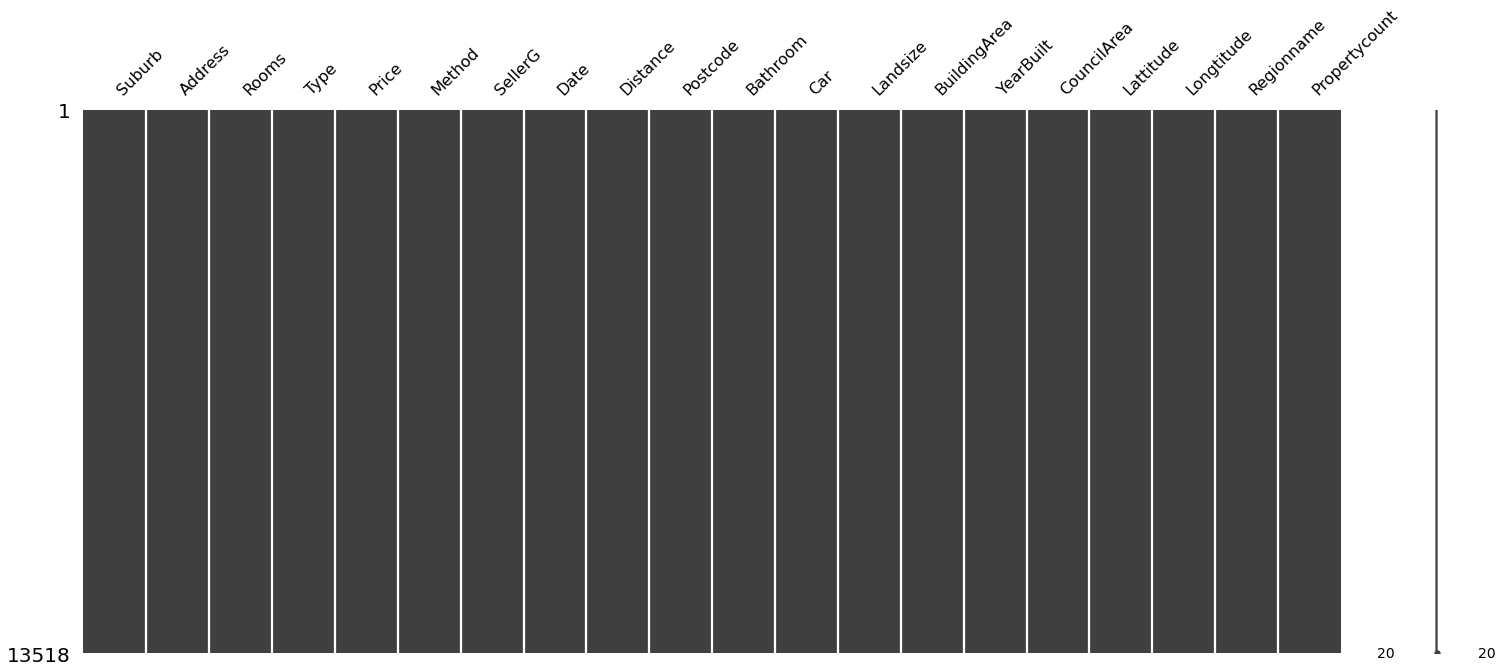

In [48]:
msno.matrix(melb_imp_constant)

In [49]:
melb_imp_constant.head(25)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,1.00,1.00,202.00,0.00,0.00,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,1.00,0.00,156.00,79.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
2,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,2.00,0.00,134.00,150.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,3067.00,2.00,1.00,94.00,0.00,0.00,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
4,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,1.00,2.00,120.00,142.00,2014.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
5,Abbotsford,129 Charles St,2,h,941000.00,S,Jellis,7/05/2016,2.50,3067.00,1.00,0.00,181.00,0.00,0.00,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
6,Abbotsford,124 Yarra St,3,h,1876000.00,S,Nelson,7/05/2016,2.50,3067.00,2.00,0.00,245.00,210.00,1910.00,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
7,Abbotsford,98 Charles St,2,h,1636000.00,S,Nelson,8/10/2016,2.50,3067.00,1.00,2.00,256.00,107.00,1890.00,Yarra,-37.81,145.00,Northern Metropolitan,4019.00
8,Abbotsford,6/241 Nicholson St,1,u,300000.00,S,Biggin,8/10/2016,2.50,3067.00,1.00,1.00,0.00,0.00,0.00,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
9,Abbotsford,10 Valiant St,2,h,1097000.00,S,Biggin,8/10/2016,2.50,3067.00,1.00,2.00,220.00,75.00,1900.00,Yarra,-37.80,145.00,Northern Metropolitan,4019.00


### Pros:

- Trabaja con variables categóricas **sin necesidad de usar encodings** agregando una categoria mas. 

### Cons:

- No tiene en cuenta las correlaciones entre las variables. 

- Puede intruducir **SESGOS** en los datos.

- Tiene sentido cuando la categoria que quiero agregar tiene sentido. 

### Imputar con el valor mas frecuente


In [50]:
melb_imp_most_freq = melb_df.copy()

In [51]:
imp_most_freq = SimpleImputer(strategy = 'most_frequent')

In [52]:
melb_imp_most_freq.iloc[:,:] = imp_most_freq.fit_transform(melb_imp_most_freq)

<AxesSubplot:>

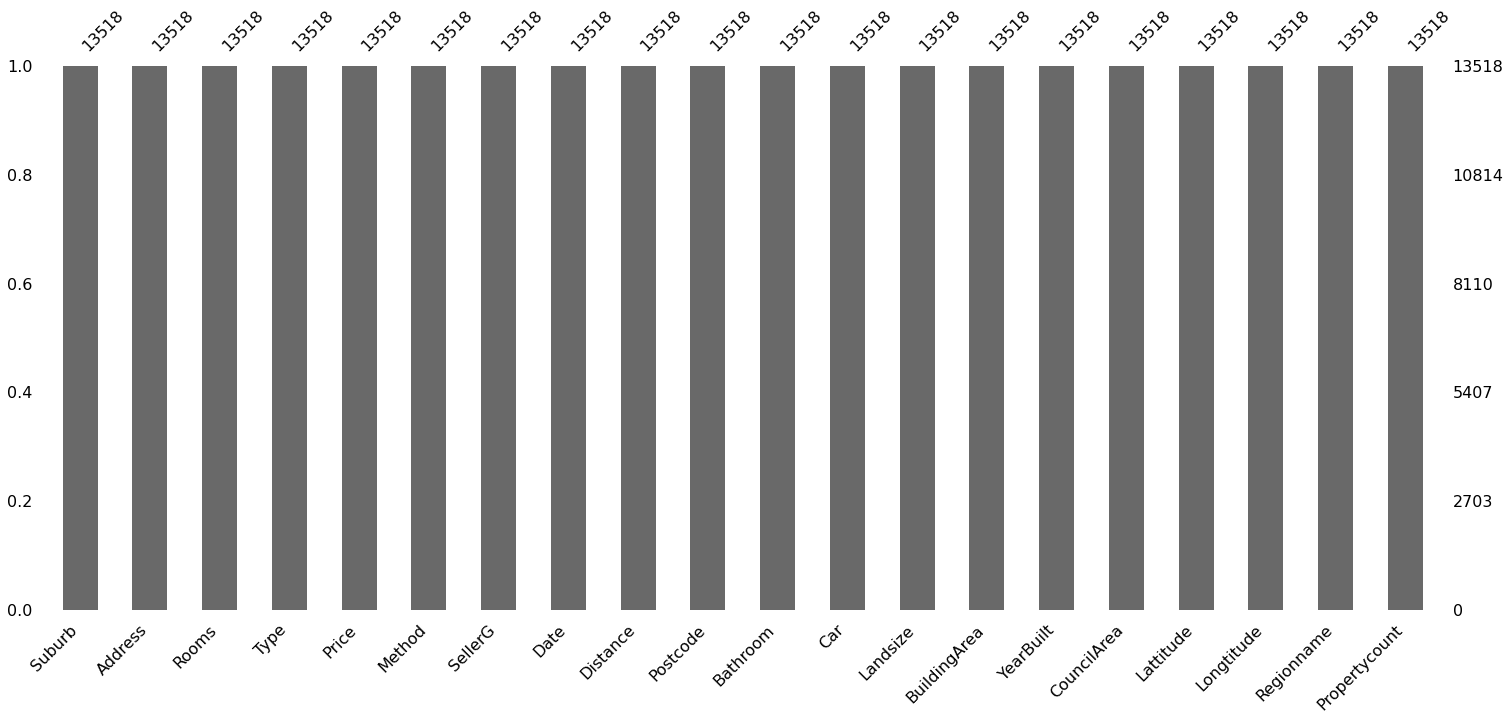

In [53]:
msno.bar(melb_imp_most_freq)

In [54]:
melb_imp_most_freq.sample(20)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
4895,Preston,2/3 Burkitt Ct,3,u,496000.00,S,hockingstuart,6/08/2016,8.80,3072.00,1.00,1.00,266.00,98.00,1990.00,Darebin,-37.73,145.03,Northern Metropolitan,14577.00
3737,Maidstone,4/4 Crefden St,2,u,335000.00,SP,Biggin,11/02/2017,9.20,3012.00,1.00,1.00,0.00,70.00,2009.00,Maribyrnong,-37.78,144.87,Western Metropolitan,3873.00
7348,Oakleigh,9/126 Atherton Rd,3,u,665000.00,S,O'Brien,30/07/2016,14.00,3166.00,1.00,1.00,112.00,120.00,1970.00,Monash,-37.90,145.10,Southern Metropolitan,3224.00
5603,South Yarra,2/13 Motherwell St,1,u,465000.00,S,Biggin,6/08/2016,3.30,3141.00,1.00,1.00,0.00,120.00,1970.00,Stonnington,-37.85,145.00,Southern Metropolitan,14887.00
13332,Yarraville,5 Maryston St,3,h,1360000.00,PI,Jas,23/09/2017,6.30,3013.00,1.00,1.00,479.00,128.00,1930.00,Moreland,-37.81,144.88,Western Metropolitan,6543.00
13053,St Albans,29 Gillespie Rd,3,h,626000.00,S,YPA,19/08/2017,14.00,3021.00,1.00,2.00,557.00,138.00,1985.00,Moreland,-37.73,144.79,Western Metropolitan,14042.00
13532,Ringwood,115 Loughnan Rd,3,h,700000.00,S,Ray,26/08/2017,19.90,3134.00,2.00,2.00,605.00,126.00,1977.00,Moreland,-37.81,145.22,Eastern Metropolitan,7785.00
4334,Niddrie,8 Rutland St,3,h,960000.00,PI,Barry,30/07/2016,11.20,3042.00,1.00,1.00,645.00,120.00,1970.00,Moonee Valley,-37.74,144.88,Western Metropolitan,2291.00
7841,Fawkner,41 McBryde St,3,t,543500.00,S,Stockdale,29/04/2017,12.40,3060.00,3.00,3.00,247.00,103.00,2011.00,Moreland,-37.71,144.97,Northern Metropolitan,5070.00
6742,Aberfeldie,29 Beaver St,5,h,1740000.00,S,Nelson,18/06/2016,9.10,3040.00,3.00,2.00,839.00,247.00,1925.00,Moonee Valley,-37.76,144.90,Western Metropolitan,1543.00


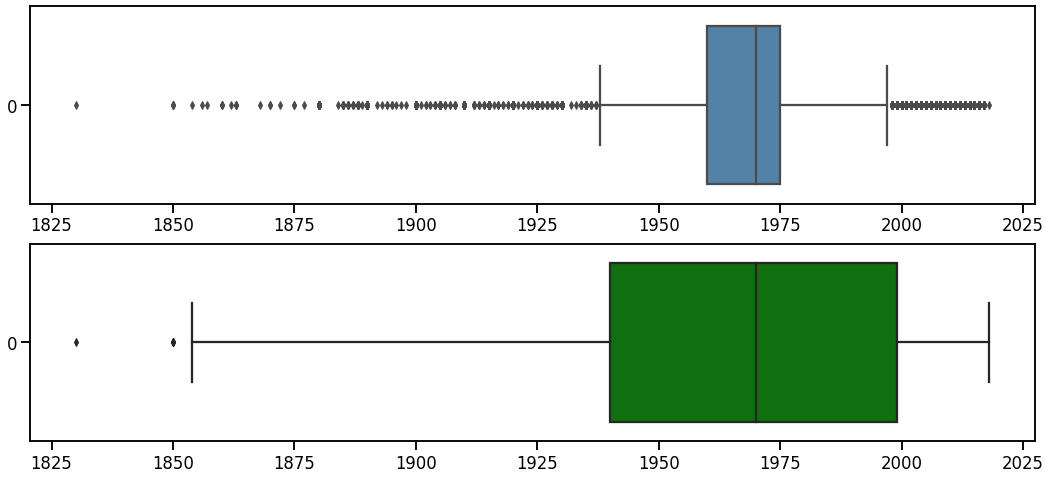

In [55]:
# creamos la figura (fig) y el epacio para los dos graficos (axes).
fig, axes = plt.subplots(nrows = 2,
                         ncols = 1,
                        figsize = (18,8))

# creamos el grafico superior de la figura. Un histograma con los datos de la columna 'YearBuilt' de la df melb_data_most_frequent 
sns.boxplot(data = melb_imp_most_freq.YearBuilt[melb_imp_most_freq.YearBuilt>1200],
            ax = axes[0],
            orient = 'h',
            color = 'steelblue')

# creamos el grafico inferior de la figura. Un histograma con los datos de la columna 'YearBuilt' de la df melb_df (antes
# de hacer la imputacion)

melb_df_without_i9968 = melb_df.drop(9968) # esta fue la unica manera en la que logre graficar este boxplot sacando el valor
# atipico que tenia la observacion con indice 9968 que tenia YearBuilt en 1196
sns.boxplot(data = melb_df_without_i9968.YearBuilt,
            ax = axes[1],
            orient = 'h',
            color = 'green')

plt.show()

### Imputar con la media

In [56]:
melb_df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [57]:
melb_imp_mean = melb_df.copy()

In [58]:
imp_mean = SimpleImputer(strategy = 'mean')

In [ ]:
# no es posible imputar columnas que no tienen valores numericos, como por ejemplo CuncilArea con un estadistico.
# no se como hacer esto con sklearn. Pero es muy sencillo hacerlo con PANDAS
melb_imp_mean.iloc[:,:] = imp_mean.fit_transform(melb_imp_mean)

In [60]:
melb_imp_mean['YearBuilt'].fillna(melb_imp_mean['YearBuilt'].mean(), inplace=True)

<AxesSubplot:>

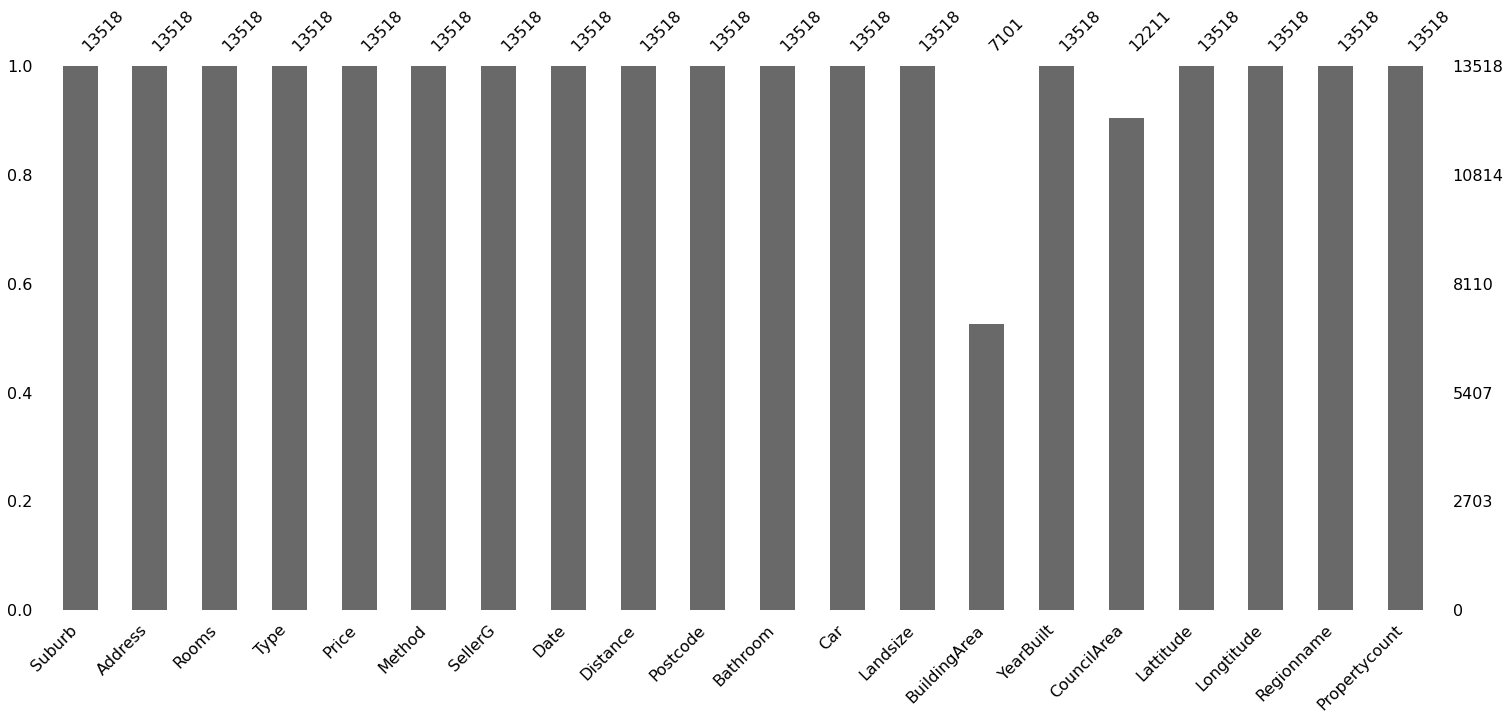

In [61]:
msno.bar(melb_imp_mean)

In [62]:
print(f'YearBuilt mean before imputation = {melb_df.YearBuilt.mean()}')
print(f'YearBuilt mean after imputation = {melb_imp_mean.YearBuilt.mean()}')

YearBuilt mean before imputation = 1964.896501101052
YearBuilt mean after imputation = 1964.8965011010519


Al haber imputado los datos faltantes por el promedio, no se modifica el promedio de la columna.

In [63]:
melb_imp_mean_2 = melb_imp_mean.copy()

In [64]:
melb_imp_mean_2['BuildingArea'].fillna(melb_imp_mean_2['BuildingArea'].mean(), inplace = True)

<AxesSubplot:>

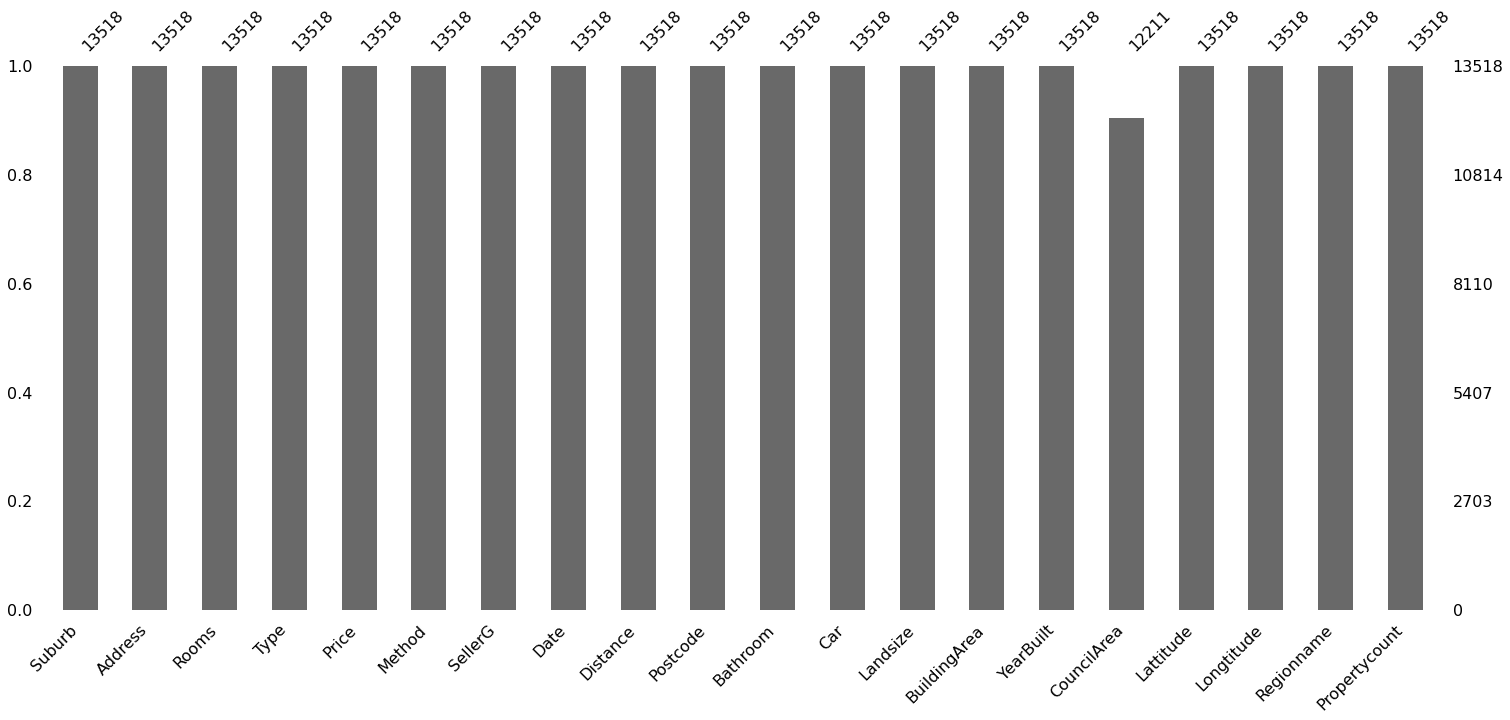

In [65]:
msno.bar(melb_imp_mean_2)

En este punto imputamos las columnas YearBuilt y BuildingArea usando la media (el promedio). Lo hicimos usando PANDAS, ya que es mucho mas sencillo que usando sklearn. La columna CouncilArea no puede ser imputada por el promedio porque los datos son categoricos y no numericos.

<AxesSubplot:>

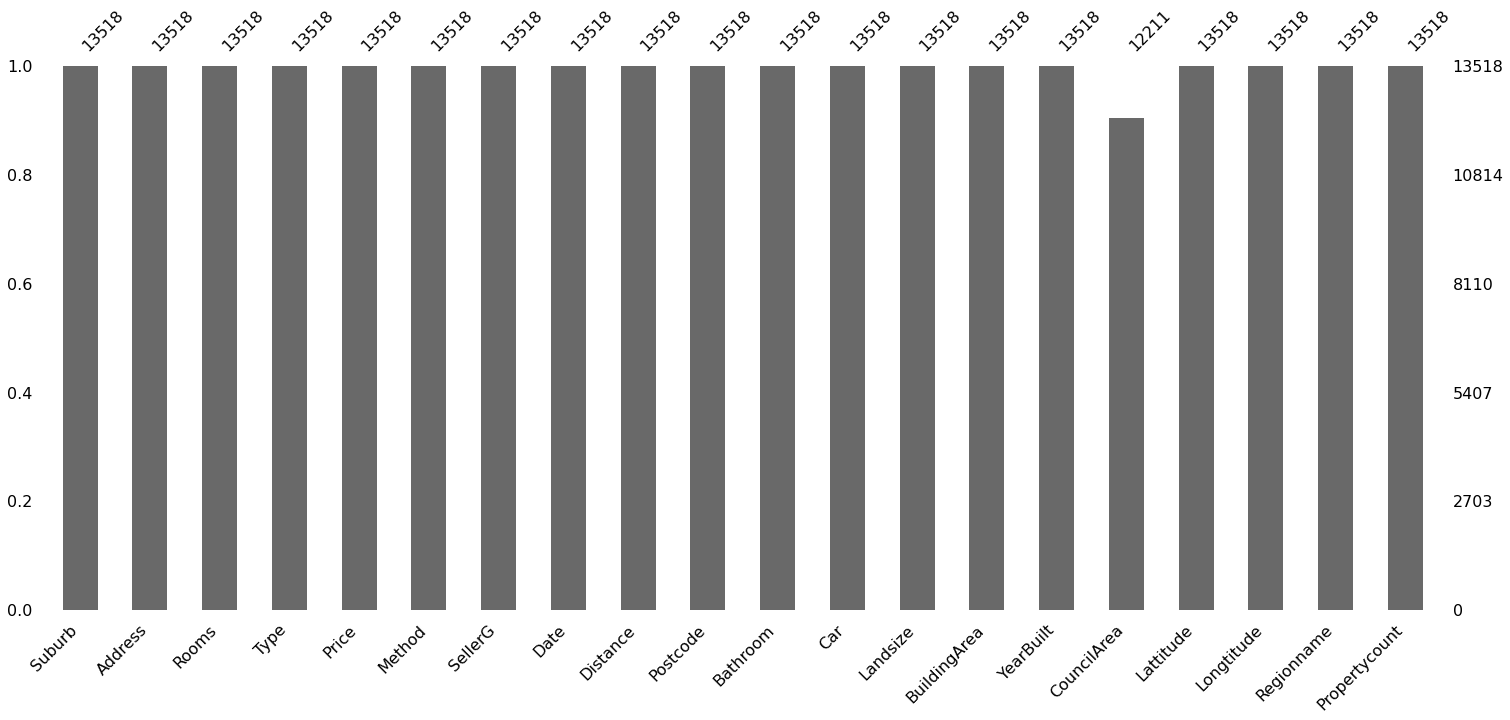

In [66]:
# mean imputation with sklearn
melb_mean_3 = melb_df.copy()

imp_mean = SimpleImputer(strategy = 'mean')

melb_mean_3[['YearBuilt','BuildingArea']] = imp_mean.fit_transform(melb_mean_3[['YearBuilt','BuildingArea']])

msno.bar(melb_mean_3)


### Técnicas de imputacion avanzadas

Técnicas de imputación avanzadas usan algortimso de  aprendizaje automático para imputar los valores del dataset, a diferencia de los métodos anteriores que usan otros valores de la misma columna para imputar. Aqui vamos a ver dos métodos, y enumerar otros métodos basado en Random Forest:

- Nearest neighbors imputation

- Multivariate feature imputation

### 2.3.1 K-Nearest Neighbor Imputation

K-Nearest Neighbor es un algoritmo muy utilizado para una clasificación simple. El algoritmo utiliza "similitud de características" para predecir los valores de cualquier nuevo punto de datos. Esto significa que al nuevo punto se le asigna un valor en función de su parecido con los puntos del conjunto de entrenamiento. Esto es muy útil para hacer predicciones sobre  valores faltantes al encontrar los k-vecinos más cercanos a la observación con datos perdidos y luego imputarlos en función de los valores no perdidos en el vecindario. 

Hay varias librerias que tienen este algoritmo

- <span style="color:FireBrick">**Fancyimpute**</span>

- <span style="color:FireBrick">**impyute**</span>

- <span style="color:FireBrick">**sklearn.impute**</span>

El siguiente codigo tiene un ejemplo del uso de la clase KNNImputer de Sklearn

In [67]:
from sklearn.impute import KNNImputer

melb_imp_knn = melb_df.copy()

imp_knn = KNNImputer(n_neighbors=5, weights='uniform')

melb_imp_knn[['YearBuilt','BuildingArea']] = imp_knn.fit_transform(melb_imp_knn[['YearBuilt','BuildingArea']])


<AxesSubplot:>

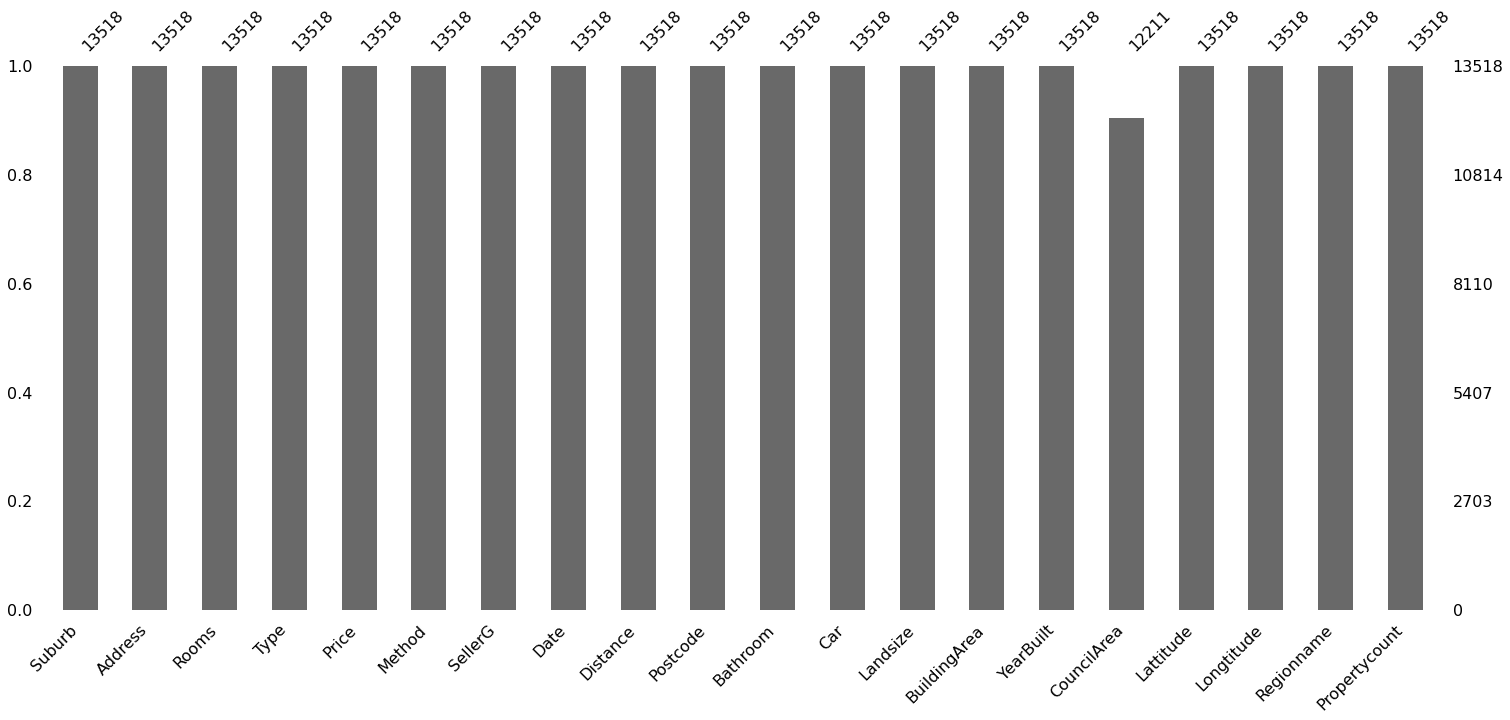

In [68]:
msno.bar(melb_imp_knn)

### Pros:

- Rápido y fácil

- Anda bien con datasets numéricos bien balanceados.

### Cons:

- Usa distancias calculadas usando los casos, aun cuando tengan NaN's, pero deben ser todas variables numericas. 

- Antes de imputar, hay que codificar las variables, usando HotEncoding, LabelEncoding o OrdinalEncoding

- KNN Imputer precisa que los datos esten estandarizados. Datos con diferentes escalas introducen valores de reemplazo sesgados   Scikit-Learn’s MinMaxScaler escala las variables al [0,1].

- No es muy preciso, y no hay computo para el error.

- CouncilArea no puede ser imputada sin realizar encoding primero.

### Iterative Imputer
notar que el metodo KNN no es un metodo iterativo. Los metodos que se aplican a continuacion si lo son.
revisar documentacion en: https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

In [69]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

### BayesianRidge (regresion lineal)

In [70]:
from sklearn.linear_model import BayesianRidge

In [71]:
melb_multi_imp_mean = melb_df.copy()
mice_imputer = IterativeImputer(random_state = 0, estimator = BayesianRidge())

In [72]:
melb_multi_imp_mean[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(melb_multi_imp_mean[['YearBuilt','BuildingArea']])

<AxesSubplot:>

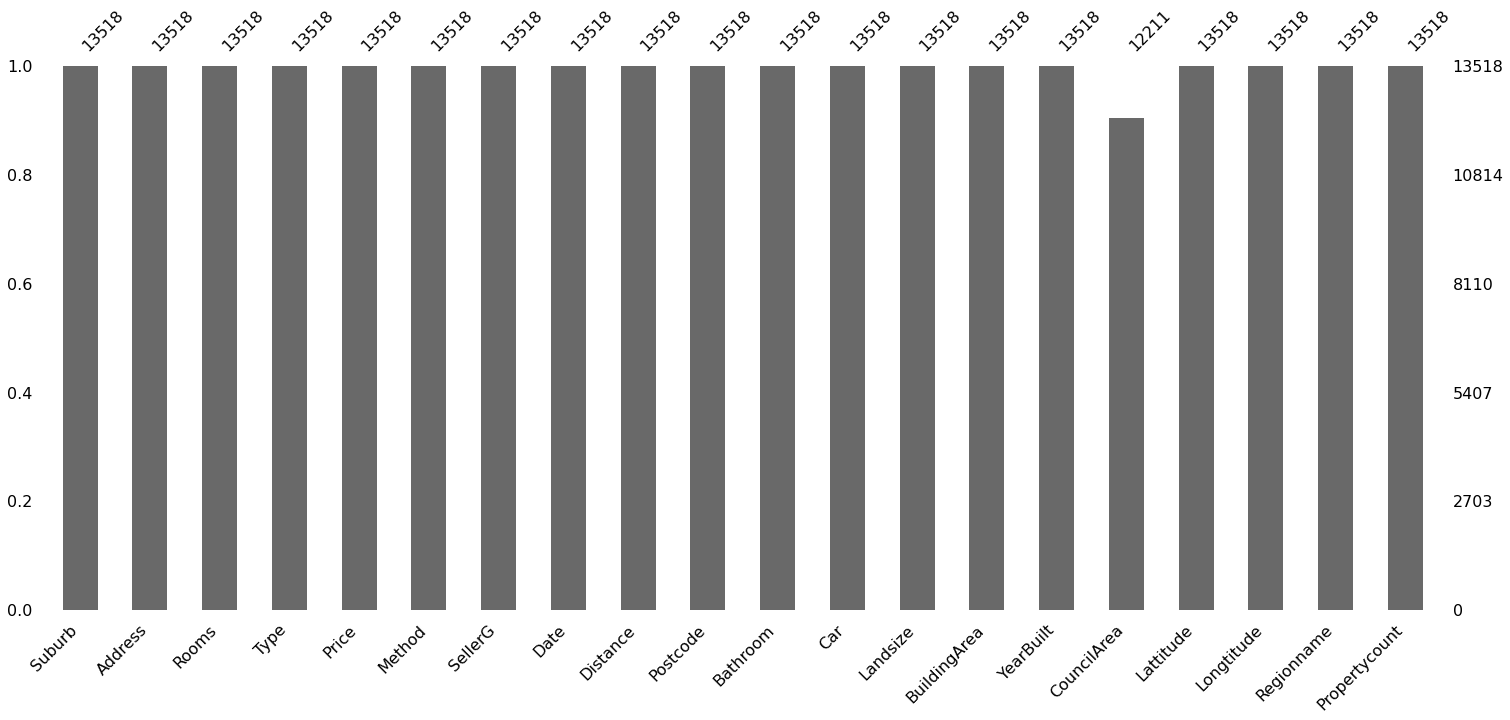

In [73]:
msno.bar(melb_multi_imp_mean)

### DecisionTreeRegressor (regresion NO lineal)


In [74]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
melb_multi_imp_DTR = melb_df.copy()

In [76]:
imp_DTR = IterativeImputer(random_state=0 ,estimator = DecisionTreeRegressor(max_features='sqrt', random_state=0))
melb_multi_imp_DTR[['YearBuilt','BuildingArea']] = imp_DTR.fit_transform(melb_multi_imp_DTR[['YearBuilt','BuildingArea']])

In [77]:
melb_multi_imp_DTR.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea      1307
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

### ExtraTreesRegressor (similar a missForest en R)

In [78]:
from sklearn.ensemble import ExtraTreesRegressor

In [79]:
melb_multi_imp_ETR = melb_df.copy()

In [80]:
imp_ETR = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10, random_state=0))

melb_multi_imp_ETR[['YearBuilt','BuildingArea']] = imp_ETR.fit_transform(melb_multi_imp_ETR[['YearBuilt','BuildingArea']])


c:\users\nico.-\appdata\local\programs\python\python38\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



In [81]:
melb_multi_imp_ETR.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea      1307
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

### KNeighborsRegressor (similar a KNN, pero con iteraciones)

In [82]:
from sklearn.neighbors import KNeighborsRegressor

In [83]:
melb_multi_imp_KNN = melb_df.copy()

In [84]:
imp_KNN = IterativeImputer(estimator = KNeighborsRegressor(n_neighbors=15))

melb_multi_imp_KNN[['YearBuilt','BuildingArea']] = imp_KNN.fit_transform(melb_multi_imp_KNN[['YearBuilt','BuildingArea']])

c:\users\nico.-\appdata\local\programs\python\python38\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



In [85]:
melb_multi_imp_KNN.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea      1307
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

### 2.3.4 Otros métodos de imputación


- **miceforest: Fast Imputation with Random Forests in Python**

Fast, memory efficient Multiple Imputation by Chained Equations (MICE) with random forests. It can impute categorical and numeric data without much setup, and has an array of diagnostic plots available. 

https://github.com/AnotherSamWilson/miceforest#Using-miceforest

https://towardsdatascience.com/multiple-imputation-with-random-forests-in-python-dec83c0ac55b

- **MissForest missingpy library**

MissForest imputes missing values using Random Forests in an iterative fashion [1]. By default, the imputer begins imputing missing values of the column (which is expected to be a variable) with the smallest number of missing values -- let's call this the candidate column. The first step involves filling any missing values of the remaining, non-candidate, columns with an initial guess, which is the column mean for columns representing numerical variables and the column mode for columns representing categorical variables.

https://towardsdatascience.com/missforest-the-best-missing-data-imputation-algorithm-4d01182aed3


- **Datawig Imputation Using Deep Learning**

Este método funciona muy bien con características categóricas y no numéricas. Es una biblioteca que aprende modelos de aprendizaje automático utilizando redes neuronales profundas para imputar valores faltantes en un marco de datos. También es compatible con CPU y GPU para entrenamiento.

- **Stochastic regression imputation**

Es bastante similar a la imputación por regresión, que intenta predecir los valores perdidos haciendo una regresión de otras variables relacionadas en el mismo conjunto de datos, más algún valor residual aleatorio.

- **Extrapolation and Interpolation** 

Intenta estimar valores de otras observaciones dentro del rango de un conjunto discreto de puntos de datos conocidos.

- **Hot-Deck imputation**

Funciona eligiendo aleatoriamente el valor faltante de un conjunto de variables relacionadas y similares.


### Conclusion

 No existe una forma perfecta de compensar los valores perdidos en un conjunto de datos. Cada estrategia puede funcionar mejor para ciertos conjuntos de datos y tipos de datos faltantes, pero puede funcionar mucho peor en otros tipos de conjuntos de datos. Hay algunas reglas establecidas para decidir qué estrategia usar para tipos particulares de valores perdidos, pero más allá de eso, debe experimentar y verificar qué modelo funciona mejor para su conjunto de datos.